# Import Packages

In [52]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

# Import DataSets

In [2]:
credit = pd.read_excel("D:\Python Foundation Case Study 2 - Credit Card Case Study\Credit Card Data.xlsx")
customer = pd.read_csv("D:\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
repayment = pd.read_csv("D:\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")
spend = pd.read_csv("D:\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")

In [3]:
credit.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC


In [4]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [5]:
repayment.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [6]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


# Exploratory data Analysis

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    float64
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    int64  
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [9]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [10]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [11]:
print(credit.shape)
print(customer.shape)
print(repayment.shape)
print(spend.shape)

(100, 8)
(100, 8)
(1523, 5)
(1500, 5)


In [12]:
credit.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [13]:
customer.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [14]:
repayment.isna().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [15]:
repayment.dropna(axis=1,how='all',inplace=True)

In [16]:
repayment.dropna(axis=0,how='all',inplace=True)

In [17]:
repayment.isna().sum()

SL No:      1
Customer    0
Month       0
Amount      0
dtype: int64

In [18]:
spend.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

### (1) In the above dataset,
### (a) In case age is less than 18, replace it with mean of age values.

In [19]:
mean_age=customer.Age.mean()


46.49

In [24]:
print(f"The mean age is {mean_age}")

The mean age is 46.49


In [25]:

customer.loc[(customer.Age <18),'Age'] = mean_age

In [26]:
customer.head(20)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.00,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.00,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.00,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.00,BANGALORE,Platimum,10002.0,C5,Normal Salary
5,6,A6,70.00,DELHI,Silver,100000.0,C6,Self Employed
6,7,A7,26.00,COCHIN,Silver,100001.0,C7,Salaried_MNC
7,8,A8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,79.00,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,54.00,CALCUTTA,Gold,500000.0,C10,Normal Salary


In [27]:
new_mean_age = customer.Age.mean()

In [28]:
print(f"The new mean age is {new_mean_age}")

The new mean age is 48.399399999999986


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [29]:
cust_spend = pd.merge(left=customer,right=spend,how='inner',on='Customer')

In [30]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [31]:
cust_spend.loc[cust_spend['Amount'] > cust_spend['Limit'],'Amount'] = (50*cust_spend['Limit']).div(100)

In [32]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit

In [33]:
cust_repay = pd.merge(left=customer,right=repayment,how='inner',on='Customer')

In [34]:
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,310992.30
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,121874.90
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,337815.57
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,25682.73


In [35]:
cust_repay.loc[cust_repay.Amount > cust_repay.Limit,'Amount'] = cust_repay.Limit

### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?


In [37]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [67]:
summ = customer['Customer'].nunique()

In [68]:
print(f"The number of distinct customer are {summ}")

The number of distinct customer are 100


###  b. How many distinct categories exist?


In [69]:
summ1 = customer['Segment'].nunique()

In [70]:
print(f"The number of distinct categories are {summ1}")

The number of distinct categories are 5


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


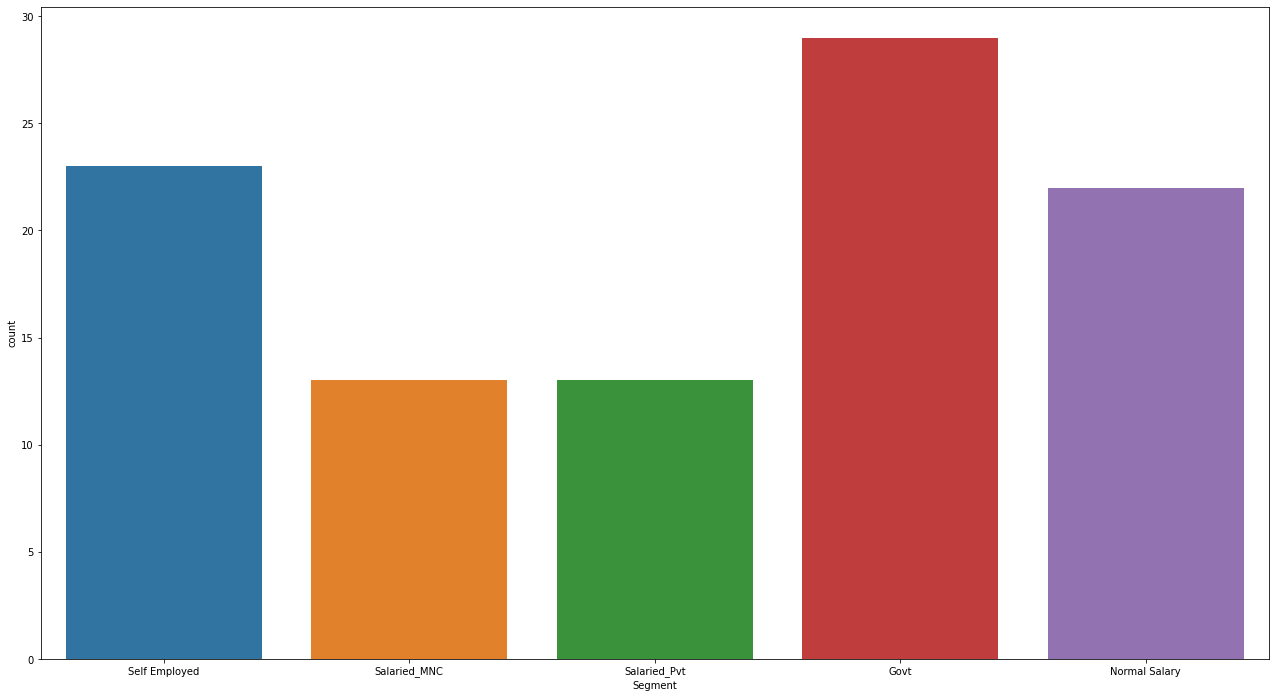

In [71]:
plt.figure(figsize=(22,12))
sns.countplot('Segment',data=customer)
plt.show()

###  c. What is the average monthly spend by customers?

In [42]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [43]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [44]:
dob = pd.to_datetime(spend['Month'],format="%d-%b-%y")

In [45]:
spend['Month'] = dob

In [46]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13


In [48]:
spend['month'] = spend['Month'].apply(lambda x: dt.datetime.strftime(x,'%B'))

In [49]:
spend['year'] = spend['Month'].apply(lambda x: dt.datetime.strftime(x,'%Y'))

In [50]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount,month,year
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004


In [72]:
summ2 = spend.groupby(['year','month']).Amount.mean()

In [73]:
pd.DataFrame(summ2)

Amount
year month                   
2004 April      235272.037143
     February   221215.270000
     January    251712.068664
     March      232146.119286
     May        217539.236429
     November   270486.397857
     September  310923.383571
2005 April      252181.326429
     August     233734.634286
     December   147503.060000
     February   229802.279821
     January    292741.372857
     July       229116.663571
     June       262688.112857
     May        245696.515429
     November   286143.322857
     October    194568.640714
     September  188666.202143
2006 April      232468.967553
     August     240699.717143
     December   270470.980714
     February   253858.260714
     January    282058.006429
     July       287505.098929
     June       177252.386429
     March      247166.084654
     May        236162.740357
     November   182841.290000
     October    236136.335000
     September  158520.090714

###  d. What is the average monthly repayment by customers?

In [60]:
repayment.head(2)

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02


In [61]:
dob1 = pd.to_datetime(repayment['Month'],format="%d-%b-%y")

In [62]:
repayment['Month']= dob1

In [63]:
repayment

,SL No:,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75
1,2.0,A1,2004-01-03,245899.02
2,3.0,A1,2004-01-15,259490.06
3,4.0,A1,2004-01-25,437555.12
4,5.0,A1,2005-01-17,165972.88
...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77
1496,1497.0,A68,2006-05-10,319836.49
1497,1498.0,A69,2006-07-11,247628.45
1498,1499.0,A70,2005-08-12,454016.51


In [64]:
repayment['month']= spend['Month'].apply(lambda x: dt.datetime.strftime(x,'%B'))

In [65]:
repayment['year']= spend['Month'].apply(lambda x: dt.datetime.strftime(x,'%Y'))

In [66]:
repayment

,SL No:,Customer,Month,Amount,month,year
0,NaN,A1,2004-01-12,495414.75,January,2004
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,February,2006
1496,1497.0,A68,2006-05-10,319836.49,March,2006
1497,1498.0,A69,2006-07-11,247628.45,March,2006
1498,1499.0,A70,2005-08-12,454016.51,March,2006


In [74]:
summ3 = repayment.groupby(['year','month']).Amount.mean()

In [75]:
pd.DataFrame(summ3)

Amount
year month                   
2004 April      272055.627500
     February   236745.639643
     January    248839.599511
     March      243941.665714
     May        226604.377143
     November   229386.352143
     September  230077.797143
2005 April      249377.405714
     August     234056.370714
     December   325930.967143
     February   263906.451250
     January    196615.430357
     July       264188.297857
     June       217940.918810
     May        240969.149286
     November   245651.498571
     October    256791.863571
     September  174762.825714
2006 April      239652.372553
     August     263206.928571
     December   204621.001429
     February   249520.686429
     January    242672.027143
     July       204736.559643
     June       324870.033571
     March      255599.066267
     May        253574.374286
     November   245622.959643
     October    271987.877857
     September  264404.009286

###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [76]:
new_table =pd.merge(left=cust_spend,right=repayment,how='inner',on='Customer')

In [77]:
new_table

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January,2004
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January,2004
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January,2004
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January,2004


In [78]:
new_table.rename(columns={"Amount_x":"spend_amt","Amount_y":"repay_amt"},inplace=True)

In [79]:
new_table

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,spend_amt,SL No:,Month_y,repay_amt,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January,2004
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January,2004
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January,2004
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January,2004


In [83]:
summ4 = new_table.groupby(['year','month'])[['spend_amt','repay_amt']].sum()

In [84]:
summ4

spend_amt     repay_amt
year month                                
2004 April      8.996964e+07  1.877279e+08
     February   9.712613e+07  1.601721e+08
     January    1.110916e+09  1.862556e+09
     March      4.937387e+07  9.675021e+07
     May        6.277974e+07  8.418437e+07
     November   3.896955e+07  8.707376e+07
     September  6.311293e+07  9.108039e+07
2005 April      1.219911e+08  1.883717e+08
     August     1.030419e+08  1.758676e+08
     December   4.708320e+07  1.167666e+08
     February   7.486470e+08  1.105814e+09
     January    1.125537e+08  1.490347e+08
     July       5.443618e+07  1.041658e+08
     June       2.044572e+08  2.657277e+08
     May        5.923259e+08  8.803802e+08
     November   1.653441e+08  2.675928e+08
     October    3.806102e+07  8.441862e+07
     September  3.701584e+07  5.653073e+07
2006 April      3.316001e+08  5.560603e+08
     August     8.789421e+07  1.107554e+08
     December   4.738823e+07  6.213306e+07
     February   1.404428e+08  2.374279e+08
     January    4.906958e+07  8.560870e+07
     July       1.297288e+08  1.512545e+08
     June       5.662796e+07  1.157311e+08
     March      7.081204e+08  1.330487e+09
     May        1.897421e+08  3.490829e+08
     November   1.084492e+08  1.525374e+08
     October    7.738059e+07  9.838252e+07
     September  8.433888e+07  1.012911e+08

In [85]:
summ4['Monthly_profit'] = summ4['repay_amt']-summ4['spend_amt']

In [86]:
summ4

spend_amt     repay_amt  Monthly_profit
year month                                                
2004 April      8.996964e+07  1.877279e+08    9.775822e+07
     February   9.712613e+07  1.601721e+08    6.304594e+07
     January    1.110916e+09  1.862556e+09    7.516401e+08
     March      4.937387e+07  9.675021e+07    4.737634e+07
     May        6.277974e+07  8.418437e+07    2.140464e+07
     November   3.896955e+07  8.707376e+07    4.810421e+07
     September  6.311293e+07  9.108039e+07    2.796746e+07
2005 April      1.219911e+08  1.883717e+08    6.638057e+07
     August     1.030419e+08  1.758676e+08    7.282580e+07
     December   4.708320e+07  1.167666e+08    6.968337e+07
     February   7.486470e+08  1.105814e+09    3.571669e+08
     January    1.125537e+08  1.490347e+08    3.648104e+07
     July       5.443618e+07  1.041658e+08    4.972963e+07
     June       2.044572e+08  2.657277e+08    6.127042e+07
     May        5.923259e+08  8.803802e+08    2.880543e+08
     November   1.653441e+08  2.675928e+08    1.022487e+08
     October    3.806102e+07  8.441862e+07    4.635760e+07
     September  3.701584e+07  5.653073e+07    1.951489e+07
2006 April      3.316001e+08  5.560603e+08    2.244602e+08
     August     8.789421e+07  1.107554e+08    2.286115e+07
     December   4.738823e+07  6.213306e+07    1.474483e+07
     February   1.404428e+08  2.374279e+08    9.698509e+07
     January    4.906958e+07  8.560870e+07    3.653912e+07
     July       1.297288e+08  1.512545e+08    2.152571e+07
     June       5.662796e+07  1.157311e+08    5.910316e+07
     March      7.081204e+08  1.330487e+09    6.223664e+08
     May        1.897421e+08  3.490829e+08    1.593408e+08
     November   1.084492e+08  1.525374e+08    4.408826e+07
     October    7.738059e+07  9.838252e+07    2.100193e+07
     September  8.433888e+07  1.012911e+08    1.695226e+07

In [87]:
summ4['interest'] = (2.9*summ4['Monthly_profit']).div(100)

In [88]:
summ4

spend_amt     repay_amt  Monthly_profit      interest
year month                                                              
2004 April      8.996964e+07  1.877279e+08    9.775822e+07  2.834988e+06
     February   9.712613e+07  1.601721e+08    6.304594e+07  1.828332e+06
     January    1.110916e+09  1.862556e+09    7.516401e+08  2.179756e+07
     March      4.937387e+07  9.675021e+07    4.737634e+07  1.373914e+06
     May        6.277974e+07  8.418437e+07    2.140464e+07  6.207344e+05
     November   3.896955e+07  8.707376e+07    4.810421e+07  1.395022e+06
     September  6.311293e+07  9.108039e+07    2.796746e+07  8.110563e+05
2005 April      1.219911e+08  1.883717e+08    6.638057e+07  1.925036e+06
     August     1.030419e+08  1.758676e+08    7.282580e+07  2.111948e+06
     December   4.708320e+07  1.167666e+08    6.968337e+07  2.020818e+06
     February   7.486470e+08  1.105814e+09    3.571669e+08  1.035784e+07
     January    1.125537e+08  1.490347e+08    3.648104e+07  1.057950e+06
     July       5.443618e+07  1.041658e+08    4.972963e+07  1.442159e+06
     June       2.044572e+08  2.657277e+08    6.127042e+07  1.776842e+06
     May        5.923259e+08  8.803802e+08    2.880543e+08  8.353575e+06
     November   1.653441e+08  2.675928e+08    1.022487e+08  2.965213e+06
     October    3.806102e+07  8.441862e+07    4.635760e+07  1.344370e+06
     September  3.701584e+07  5.653073e+07    1.951489e+07  5.659318e+05
2006 April      3.316001e+08  5.560603e+08    2.244602e+08  6.509347e+06
     August     8.789421e+07  1.107554e+08    2.286115e+07  6.629734e+05
     December   4.738823e+07  6.213306e+07    1.474483e+07  4.275999e+05
     February   1.404428e+08  2.374279e+08    9.698509e+07  2.812568e+06
     January    4.906958e+07  8.560870e+07    3.653912e+07  1.059634e+06
     July       1.297288e+08  1.512545e+08    2.152571e+07  6.242456e+05
     June       5.662796e+07  1.157311e+08    5.910316e+07  1.713992e+06
     March      7.081204e+08  1.330487e+09    6.223664e+08  1.804863e+07
     May        1.897421e+08  3.490829e+08    1.593408e+08  4.620883e+06
     November   1.084492e+08  1.525374e+08    4.408826e+07  1.278560e+06
     October    7.738059e+07  9.838252e+07    2.100193e+07  6.090559e+05
     September  8.433888e+07  1.012911e+08    1.695226e+07  4.916156e+05

### (f) What are the top 5 product types?

In [89]:
spend.head(5)

,Sl No:,Customer,Month,Type,Amount,month,year
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


###  g. Which city is having maximum spend?


In [90]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [119]:
summ5 = cust_spend.groupby('City').Amount.sum().sort_values(ascending=False)

In [120]:
summ5

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

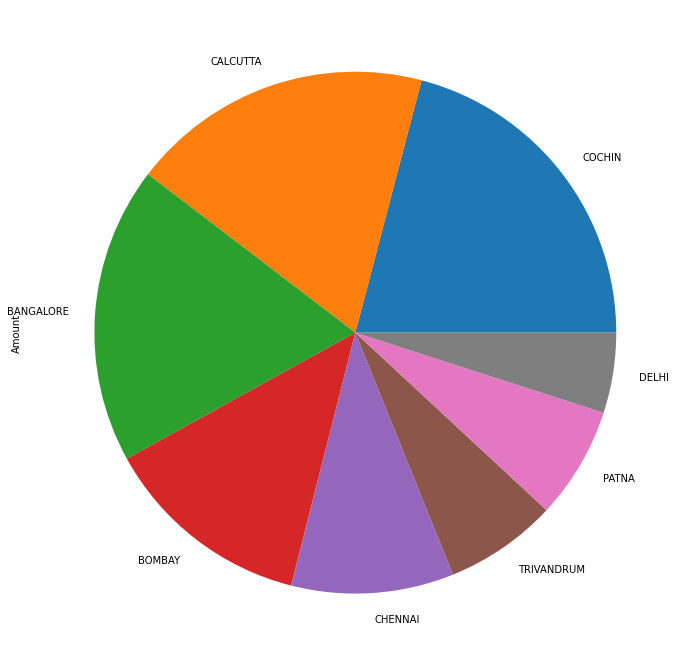

In [122]:
plt.figure(figsize=(22,12))
summ5.plot(kind='pie')
plt.show()

### (h) Which age group is spending more money?

In [97]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [98]:
cust_spend['Age_Group'] = pd.cut(cust_spend.Age,bins=np.arange(18,88,8),labels=['18-26','26-34','34-42','42-50','50-58','58-66','66-74','74-82'],)

In [99]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [113]:
summ6 = cust_spend.groupby('Age_Group').Amount.sum().sort_values(ascending=False)

In [123]:
summ6

Age_Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

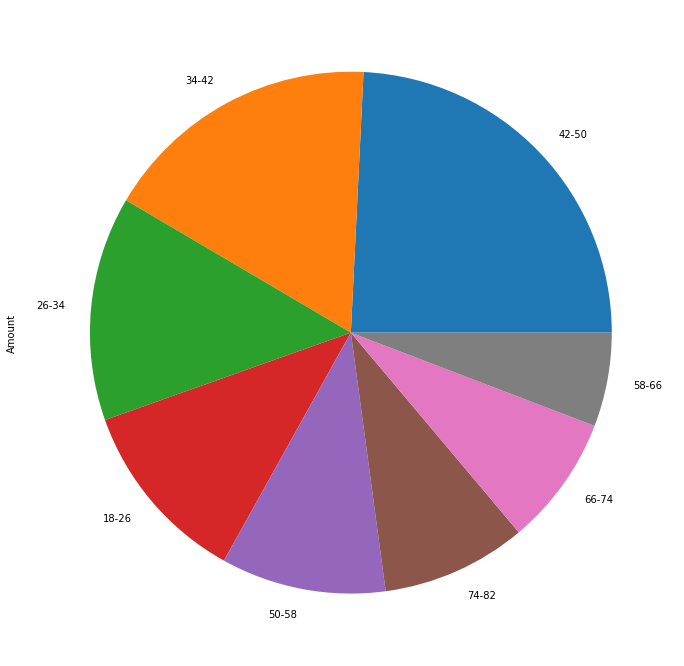

In [117]:
plt.figure(figsize=(22,12))
summ6.plot(kind="pie")
#plt.legend()
plt.show()

In [124]:
print("42-50 Age group is spending more money")

42-50 Age group is spending more money


### i. Who are the top 10 customers in terms of repayment?

In [125]:
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,10002.00


In [127]:
summ7 = pd.DataFrame(cust_repay.groupby('Customer').Amount.sum())

In [128]:
summ7

,Amount
Customer,
A1,4753691.67
A10,3695647.52
A100,69551.19
A11,5310934.03
A12,8334760.16
...,...
A95,369405.96
A96,100000.00
A97,10000.00


In [129]:
summ7.sort_values('Amount',ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### (3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [130]:
cust_spend['Month'] = pd.to_datetime(cust_spend['Month'],format="%d-%b-%y")

In [131]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,50-58
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,50-58
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,50-58
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,34-42


In [132]:
cust_spend['month']= cust_spend['Month'].apply(lambda x:dt.datetime.strftime(x,"%B"))

In [133]:
cust_spend['year']= cust_spend['Month'].apply(lambda x:dt.datetime.strftime(x,"%Y"))

In [134]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,50-58,January,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,50-58,January,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,50-58,January,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,34-42,January,2004


In [135]:
summ8 = pd.DataFrame(cust_spend.groupby(['City','Product','year']).Amount.sum()).head(50)

In [136]:
summ8

Amount
City      Product  year             
BANGALORE Gold     2004   9289878.54
                   2005  12892362.99
                   2006  12030611.09
          Platimum 2004   1112732.30
                   2005    912284.97
                   2006    685831.27
          Silver   2004   1291852.58
                   2005    830612.34
                   2006   1415480.94
BOMBAY    Gold     2004   6987853.53
                   2005   8983018.28
                   2006   7917144.31
          Platimum 2004    897264.94
                   2005    711804.94
                   2006    972130.01
          Silver   2004    532089.03
                   2005    508988.54
                   2006   1092833.80
CALCUTTA  Gold     2004   7477140.98
                   2005  10303355.80
                   2006  11167532.77
          Platimum 2004   2037690.30
                   2005   4434696.31
                   2006   3589606.66
          Silver   2004    500006.00
                   2005    440147.06
                   2006   1157956.42
CHENNAI   Gold     2004   1059618.50
                   2005   3740945.58
                   2006   2704288.62
          Platimum 2004   3535652.38
                   2005   5053956.32
                   2006   5024923.40
          Silver   2004    282056.86
                   2005    377184.49
                   2006    350009.50
COCHIN    Gold     2004   7315850.15
                   2005  12110613.03
                   2006  10499142.38
          Platimum 2004   3419904.07
                   2005   4960921.71
                   2006   4920592.29
          Silver   2004    814229.62
                   2005    652269.38
                   2006   1269990.87
DELHI     Gold     2004   2806495.00
                   2005   1964845.27
                   2006   2957103.32
          Platimum 2004    283512.89
                   2005    494157.86

In [137]:
summ9 = pd.pivot_table(data = cust_spend,index=['City','Product'],columns='year',values= 'Amount',aggfunc=sum)

In [138]:
summ9

year                       2004         2005         2006
City       Product                                       
BANGALORE  Gold      9289878.54  12892362.99  12030611.09
           Platimum  1112732.30    912284.97    685831.27
           Silver    1291852.58    830612.34   1415480.94
BOMBAY     Gold      6987853.53   8983018.28   7917144.31
           Platimum   897264.94    711804.94    972130.01
           Silver     532089.03    508988.54   1092833.80
CALCUTTA   Gold      7477140.98  10303355.80  11167532.77
           Platimum  2037690.30   4434696.31   3589606.66
           Silver     500006.00    440147.06   1157956.42
CHENNAI    Gold      1059618.50   3740945.58   2704288.62
           Platimum  3535652.38   5053956.32   5024923.40
           Silver     282056.86    377184.49    350009.50
COCHIN     Gold      7315850.15  12110613.03  10499142.38
           Platimum  3419904.07   4960921.71   4920592.29
           Silver     814229.62    652269.38   1269990.87
DELHI      Gold      2806495.00   1964845.27   2957103.32
           Platimum   283512.89    494157.86    176788.72
           Silver     768172.30    612311.21    854899.97
PATNA      Gold      2072567.90   3252615.77   2276181.69
           Platimum  1113069.60   2883231.07   1256137.65
           Silver     756684.10    950094.19    700005.00
TRIVANDRUM Gold      2415102.84   1240375.85   2735710.87
           Platimum  2161676.67   3601443.30   2147403.75
           Silver     209667.48    269912.99    555862.12

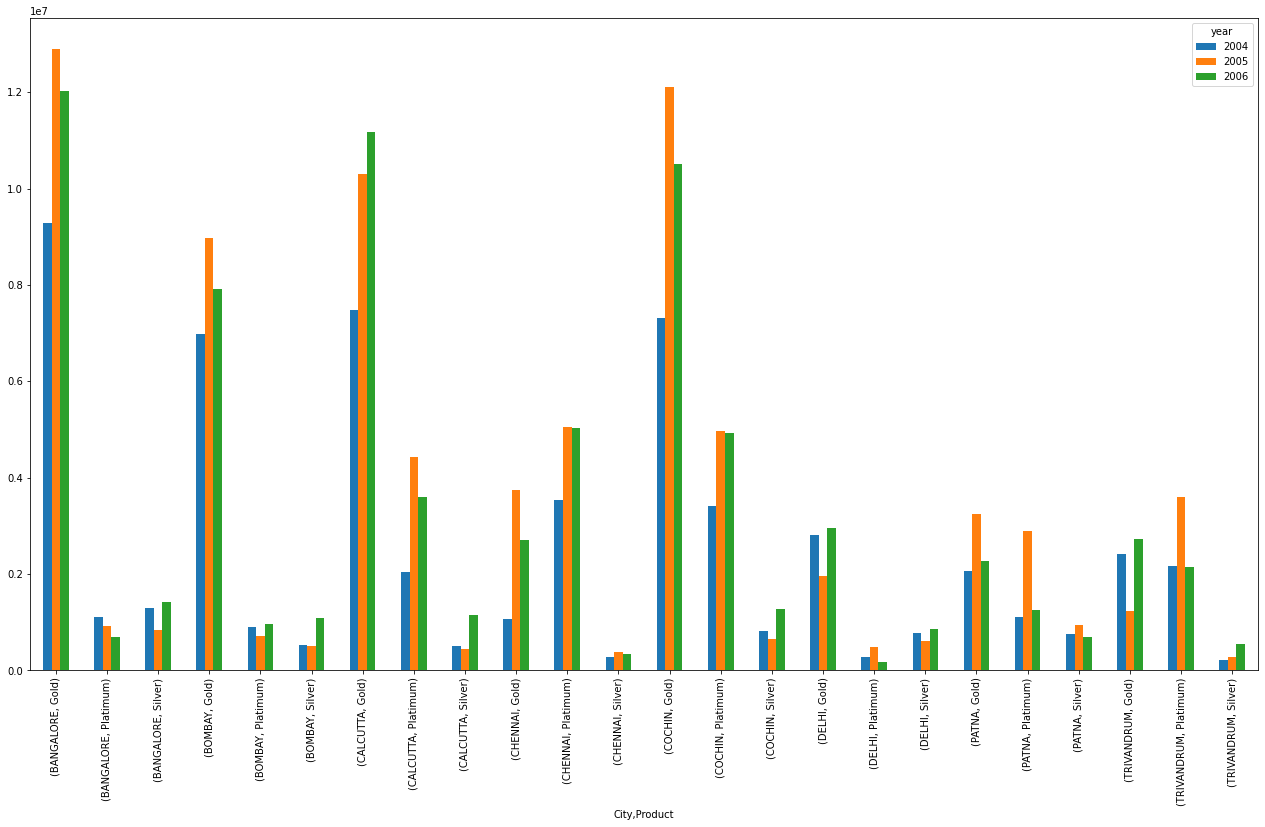

In [139]:
summ9.plot(kind='bar',figsize=(22,12))
plt.show()

In [140]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,50-58,January,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,50-58,January,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,50-58,January,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,34-42,January,2004


### (4) Create graphs for
### (a) Monthly comparison of total spends, city wise

In [141]:
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,January,2004


In [142]:
summ10 = pd.pivot_table(data=cust_spend,index='City',columns='month',values='Amount',aggfunc=sum)

In [143]:
summ10

month,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


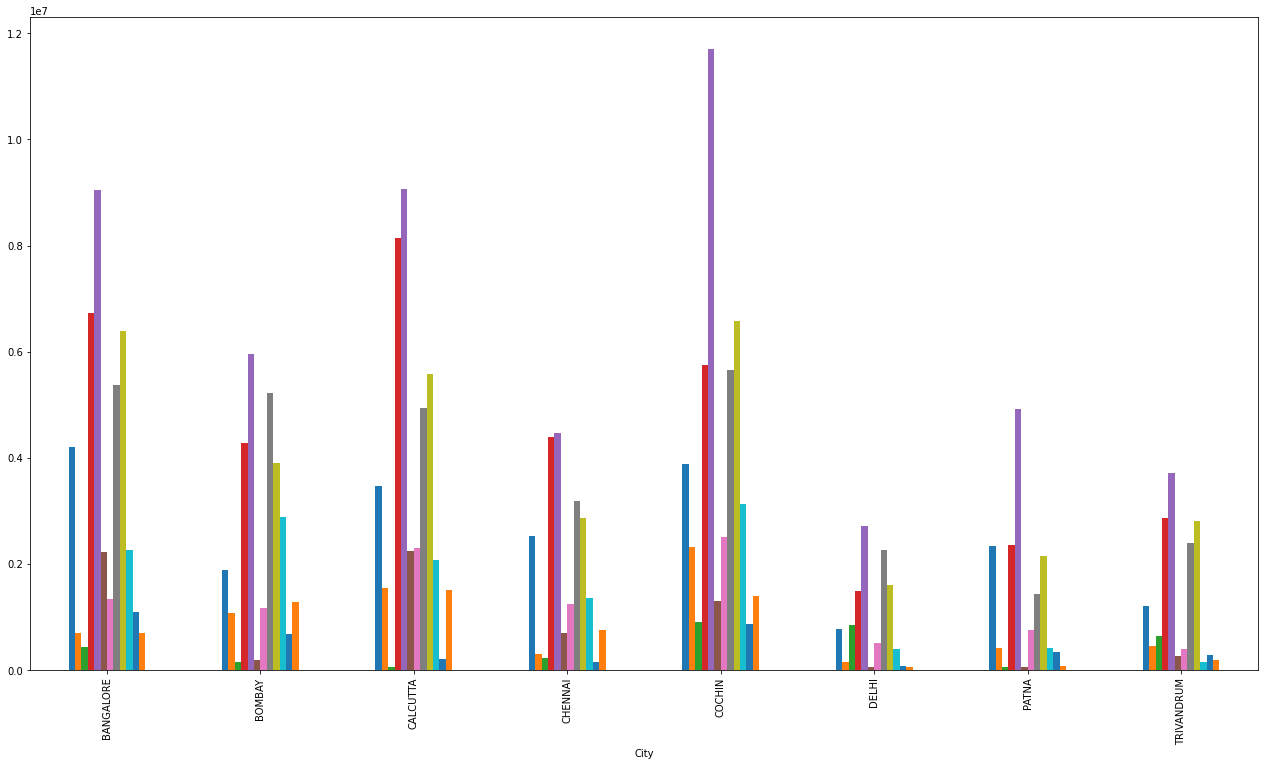

In [144]:
summ10.plot(kind='bar',legend=False,figsize = (22,12))
plt.show()

### b. Comparison of yearly spend on air tickets

In [145]:
summ11 = pd.DataFrame(cust_spend.groupby(['year','Type']).Amount.sum().reset_index())

In [146]:
summ11

,year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [150]:
filtered = summ11.loc[summ11['Type']=='AIR TICKET']

In [151]:
filtered

,year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


###  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [152]:
summ12 = cust_spend.groupby(['month','Product']).Amount.sum()

In [153]:
summ12

month      Product 
April      Gold        13170572.59
           Platimum     5182493.86
           Silver       1902322.65
August     Gold         4954030.42
           Platimum     1714762.80
           Silver        293109.82
December   Gold         2332940.96
           Platimum      750156.19
           Silver        200537.90
February   Gold        24779179.55
           Platimum     9134054.58
           Silver       2087018.37
January    Gold        32413831.83
           Platimum    14951578.51
           Silver       4206383.62
July       Gold         5167416.37
           Platimum     1288156.26
           Silver        530153.72
June       Gold         6538862.64
           Platimum     2965712.71
           Silver        689537.61
March      Gold        19256972.48
           Platimum     7288837.68
           Silver       3909405.83
May        Gold        21548169.76
           Platimum     8151926.49
           Silver       2140940.01
November   Gold         9203267.46


In [154]:
summ113 = pd.pivot_table(data=cust_spend,index='Product',columns='month',values='Amount',aggfunc=sum)

In [155]:
summ113

month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by
### different products and by different time periods i.e. year or month. The user should be able
### to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
### function should automatically take these inputs while identifying the top 10 customers.

In [156]:
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,10002.00


In [157]:
cust_repay['Month']= pd.to_datetime(cust_repay['Month'],format="%d-%b-%y")

In [158]:
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,10002.00


In [159]:
cust_repay['month'] = cust_repay['Month'].apply(lambda x:dt.datetime.strftime(x,"%B"))

In [160]:
cust_repay['year'] = cust_repay['Month'].apply(lambda x:dt.datetime.strftime(x,"%Y"))

In [161]:
cust_repay.City.unique()

array(['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM'], dtype=object)

In [162]:
pivot = pd.pivot_table(data=cust_repay,index=['Product','City','Customer'],columns='month',values='Amount',aggfunc=sum)

In [163]:
cust_repay.Product.unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [164]:
def hype(product,timeperiod):
    #print(f"The product is {product}and the timeperiod is {timeperiod}")
    if product.lower() == 'gold' and timeperiod.lower() == 'month':
        pivot = pd.pivot_table(data=cust_repay,index=['Product','City','Customer'],columns='month',values='Amount',aggfunc=sum)
        result = pivot.loc[('Gold',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='year':
        pivot = pd.pivot_table(data=cust_repay,index=['Product','City','Customer'],columns='year',values='Amount',aggfunc=sum)
        result = pivot.loc[('Gold',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='month':
        pivot = pd.pivot_table(data=cust_repay,index=['Product','City','Customer'],columns='month',values='Amount',aggfunc=sum)
        result = pivot.loc[('Silver',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='year':
        pivot = pd.pivot_table(data=cust_repay,index=['Product','City','Customer'],columns='year',values='Amount',aggfunc=sum)
        result = pivot.loc[('Silver',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
    elif product.lower()=='platimum' and timeperiod.lower()=='month':
        pivot = pd.pivot_table(data=cust_repay,index=['Product','City','Customer'],columns='month',values='Amount',aggfunc=sum)
        result = pivot.loc[('Platimum',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
    else:
        pivot = pd.pivot_table(data=cust_repay,index=['Product','City','Customer'],columns='year',values='Amount',aggfunc=sum)
        result = pivot.loc[('Platimum',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM']),:]
    return result

        

In [165]:
hype('gold','year')

year                               2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65